In [31]:
import os
import requests
import json
from datetime import datetime, timedelta
import time

API_KEY = "5ivtPFBog3rolXM3woHqaNqdhPqRl5N2p0TpWYTi"
API_ENDPOINT = "https://api.nasa.gov/planetary/apod"

def get_apod_data(api_key, query_date):
    try:
        payload = {"api_key": api_key, "date": query_date}
        response = requests.get(API_ENDPOINT, params=payload)
        response.raise_for_status()

        result = response.json()
        return {
            "date": result.get("date"),
            "title": result.get("title"),
            "image_url": result.get("url"),
            "description": result.get("explanation"),
            "media_type": result.get("media_type"),
        }
    except requests.exceptions.RequestException as error:
        print(f"Failed to fetch data for {query_date}: {error}")
        return None

def retrieve_apod_range(api_key, from_date, to_date, output_file="apod_results.json"):
    try:
        # Ensure the file exists and is in the correct format
        start_date = datetime.strptime(from_date, "%Y-%m-%d")
        end_date = datetime.strptime(to_date, "%Y-%m-%d")
        current_date = start_date

        with open(output_file, "a+") as file:
            # Start writing in list format if the file is empty
            if file.read(1):
                file.write(",\n")
            else:
                file.write("[\n")
            
            while current_date <= end_date:
                date_str = current_date.strftime("%Y-%m-%d")
                print(f"Acquiring data for {date_str}...")
                apod_info = get_apod_data(api_key, date_str)
                
                if apod_info:
                    json.dump(apod_info, file, indent=4)
                    file.write(",\n")
                
                time.sleep(1)  # Be respectful to the API rate limit
                current_date += timedelta(days=1)

            # Ensure the file ends correctly (remove last comma and close the list)
            file.seek(file.tell() - 2, 0)
            file.write("\n]")

    except Exception as e:
        print(f"An error occurred: {e}")

def run_script():
    start_range = "2020-01-01"
    end_range = "2020-12-31"
    output_filename = "apod_results.json"

    print("Starting year-long APOD data retrieval...")
    retrieve_apod_range(API_KEY, start_range, end_range, output_filename)
    print(f"APOD data retrieval complete. Data stored in {output_filename}.")

if __name__ == "__main__":
    run_script()


Starting year-long APOD data retrieval...
Acquiring data for 2020-01-01...
Acquiring data for 2020-01-02...
Acquiring data for 2020-01-03...
Acquiring data for 2020-01-04...
Acquiring data for 2020-01-05...
Acquiring data for 2020-01-06...
Acquiring data for 2020-01-07...
Acquiring data for 2020-01-08...
Acquiring data for 2020-01-09...
Acquiring data for 2020-01-10...
Acquiring data for 2020-01-11...
Acquiring data for 2020-01-12...
Acquiring data for 2020-01-13...
Acquiring data for 2020-01-14...
Acquiring data for 2020-01-15...
Acquiring data for 2020-01-16...
Acquiring data for 2020-01-17...
Acquiring data for 2020-01-18...
Acquiring data for 2020-01-19...
Acquiring data for 2020-01-20...
Acquiring data for 2020-01-21...
Acquiring data for 2020-01-22...
Acquiring data for 2020-01-23...
Acquiring data for 2020-01-24...
Acquiring data for 2020-01-25...
Acquiring data for 2020-01-26...
Acquiring data for 2020-01-27...
Acquiring data for 2020-01-28...
Acquiring data for 2020-01-29...
A

In [32]:
import json
import os
import csv

def read_apod_data(file_name="apod_data.json"):
    try:
        if not os.path.exists(file_name):
            raise FileNotFoundError(f"The file '{file_name}' does not exist.")
        
        with open(file_name, "r") as file:
            data = json.load(file)

        if not data:
            raise ValueError("The file is empty or contains no data.")
        
        for entry in data:
            print(f"Date: {entry.get('date', 'N/A')}, Title: {entry.get('title', 'N/A')}")
        return data

    except FileNotFoundError as fnf_error:
        print(fnf_error)
    except ValueError as value_error:
        print(value_error)
    except Exception as error:
        print(f"An error occurred: {error}")
    return []

def analyze_apod_media(file_name="apod_data.json"):
    try:
        data = read_apod_data(file_name)
        if not data:
            return

        total_images = 0
        total_videos = 0
        max_explanation_date = None
        max_explanation_length = 0

        for entry in data:
            media_type = entry.get("media_type", "").lower()
            if media_type == "image":
                total_images += 1
            elif media_type == "video":
                total_videos += 1

            explanation = entry.get("description", "")
            if len(explanation) > max_explanation_length:
                max_explanation_length = len(explanation)
                max_explanation_date = entry.get("date")

        print(f"Total images: {total_images}")
        print(f"Total videos: {total_videos}")
        print(f"Date with the longest explanation: {max_explanation_date} ({max_explanation_length} characters)")

    except Exception as error:
        print(f"An error occurred while analyzing data: {error}")

def write_apod_to_csv(file_name="apod_data.json", csv_file="apod_summary.csv"):
    try:
        data = read_apod_data(file_name)
        if not data:
            return

        file_exists = os.path.exists(csv_file)
        with open(csv_file, mode='a', newline='') as csvfile:
            csv_writer = csv.writer(csvfile)

            if not file_exists:
                csv_writer.writerow(["Date", "Title", "Media Type", "URL"])

            for entry in data:
                date = entry.get("date", "N/A")
                title = entry.get("title", "N/A")
                media_type = entry.get("media_type", "N/A")
                url = entry.get("image_url", "N/A")
                csv_writer.writerow([date, title, media_type, url])

        print(f"Data has been written to {csv_file}")

    except Exception as error:
        print(f"An error occurred while writing to the CSV file: {error}")

if __name__ == "__main__":
    analyze_apod_media()
    write_apod_to_csv()


Date: 2020-01-01, Title: Betelgeuse Imagined
Date: 2020-01-02, Title: The Fainting of Betelgeuse
Date: 2020-01-03, Title: Quadrantids over the Great Wall
Date: 2020-01-04, Title: Aurora Slathers Up the Sky
Date: 2020-01-05, Title: A Starry Night of Iceland
Date: 2020-01-06, Title: Tumultuous Clouds of Jupiter
Date: 2020-01-07, Title: IC 405: The Flaming Star Nebula
Date: 2020-01-08, Title: Galaxies in the River
Date: 2020-01-09, Title: Perihelion to Aphelion
Date: 2020-01-10, Title: Nacreous Clouds over Sweden
Date: 2020-01-11, Title: NGC 602 and Beyond
Date: 2020-01-12, Title: Stars and Dust in Corona Australis
Date: 2020-01-13, Title: A Desert Eclipse
Date: 2020-01-14, Title: Evidence of an Active Volcano on Venus
Date: 2020-01-15, Title: Iridescent Clouds over Sweden
Date: 2020-01-16, Title: NGC 247 and Friends
Date: 2020-01-17, Title: Apollo 17: A Stereo View from Lunar Orbit
Date: 2020-01-18, Title: An Almost Eclipse of the Moon
Date: 2020-01-19, Title: M1: The Incredible Expandin

In [33]:
import numpy as np


def create_array():
    arr = np.random.randint(10, 101, size=(20, 5))  
    for i in range(arr.shape[0]):
        row_sum = np.sum(arr[i])
        if row_sum % 2 != 0:  
            arr[i, -1] += 1  
    total_sum = np.sum(arr)
    if total_sum % 5 != 0:  
        diff = total_sum % 5
        arr[-1, -1] += (5 - diff)  
    return arr


def array_operations(arr):
    divisible_by_3_and_5 = arr[(arr % 3 == 0) & (arr % 5 == 0)]
    print("Elements divisible by both 3 and 5:", divisible_by_3_and_5)
    mean_value = np.mean(arr)
    arr[arr > 75] = mean_value
    print("\nArray after replacing elements greater than 75 with mean:")
    print(arr)


def statistical_operations(arr):
    mean = np.mean(arr)
    std_dev = np.std(arr)
    median = np.median(arr)
    variance = np.var(arr, axis=0)  

    print("\nStatistical operations:")
    print(f"Mean of the array: {mean}")
    print(f"Standard deviation of the array: {std_dev}")
    print(f"Median of the array: {median}")
    print(f"Variance of each column: {variance}")

if __name__ == "__main__":
    arr = create_array()
    print("Generated Array:")
    print(arr)
    array_operations(arr)
    statistical_operations(arr)


Generated Array:
[[49 85 77 43 96]
 [65 52 51 38 42]
 [26 47 39 62 78]
 [75 91 58 31 49]
 [88 50 34 59 61]
 [38 78 99 84 85]
 [96 72 40 72 44]
 [20 21 97 56 88]
 [36 43 81 50 82]
 [39 97 28 79 13]
 [47 40 20 21 26]
 [85 91 73 94 29]
 [35 93 85 80 75]
 [39 21 46 14 44]
 [29 67 16 14 36]
 [31 86 71 47 83]
 [13 33 67 80 13]
 [37 66 35 66 12]
 [32 26 66 98 48]
 [76 80 37 94 39]]
Elements divisible by both 3 and 5: [75 75]

Array after replacing elements greater than 75 with mean:
[[49 55 55 43 55]
 [65 52 51 38 42]
 [26 47 39 62 55]
 [75 55 58 31 49]
 [55 50 34 59 61]
 [38 55 55 55 55]
 [55 72 40 72 44]
 [20 21 55 56 55]
 [36 43 55 50 55]
 [39 55 28 55 13]
 [47 40 20 21 26]
 [55 55 73 55 29]
 [35 55 55 55 75]
 [39 21 46 14 44]
 [29 67 16 14 36]
 [31 55 71 47 55]
 [13 33 67 55 13]
 [37 66 35 66 12]
 [32 26 66 55 48]
 [55 55 37 55 39]]

Statistical operations:
Mean of the array: 45.84
Standard deviation of the array: 15.802354254983653
Median of the array: 50.0
Variance of each column: [223.

Number of data points: 150
Data types of columns:
Sepal.Length    float64
Sepal.Width     float64
Petal.Length    float64
Petal.Width     float64
Species           int64
dtype: object
Column names: ['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width', 'Species']
Number of flower species: 3

Corrected Rows:
    Sepal.Length  Sepal.Width  Petal.Length  Petal.Width  Species
34           4.9          3.1           1.5          0.2        0
37           4.9          3.6           1.4          0.1        0

New features added. Data saved to 'iris_corrected.csv'.

Pairwise Correlations:
              Sepal.Length  Sepal.Width  Petal.Length  Petal.Width   Species  \
Sepal.Length      1.000000    -0.117570      0.871754     0.817941  0.782561   
Sepal.Width      -0.117570     1.000000     -0.428440    -0.366126 -0.426658   
Petal.Length      0.871754    -0.428440      1.000000     0.962865  0.949035   
Petal.Width       0.817941    -0.366126      0.962865     1.000000  0.956547   
Spec

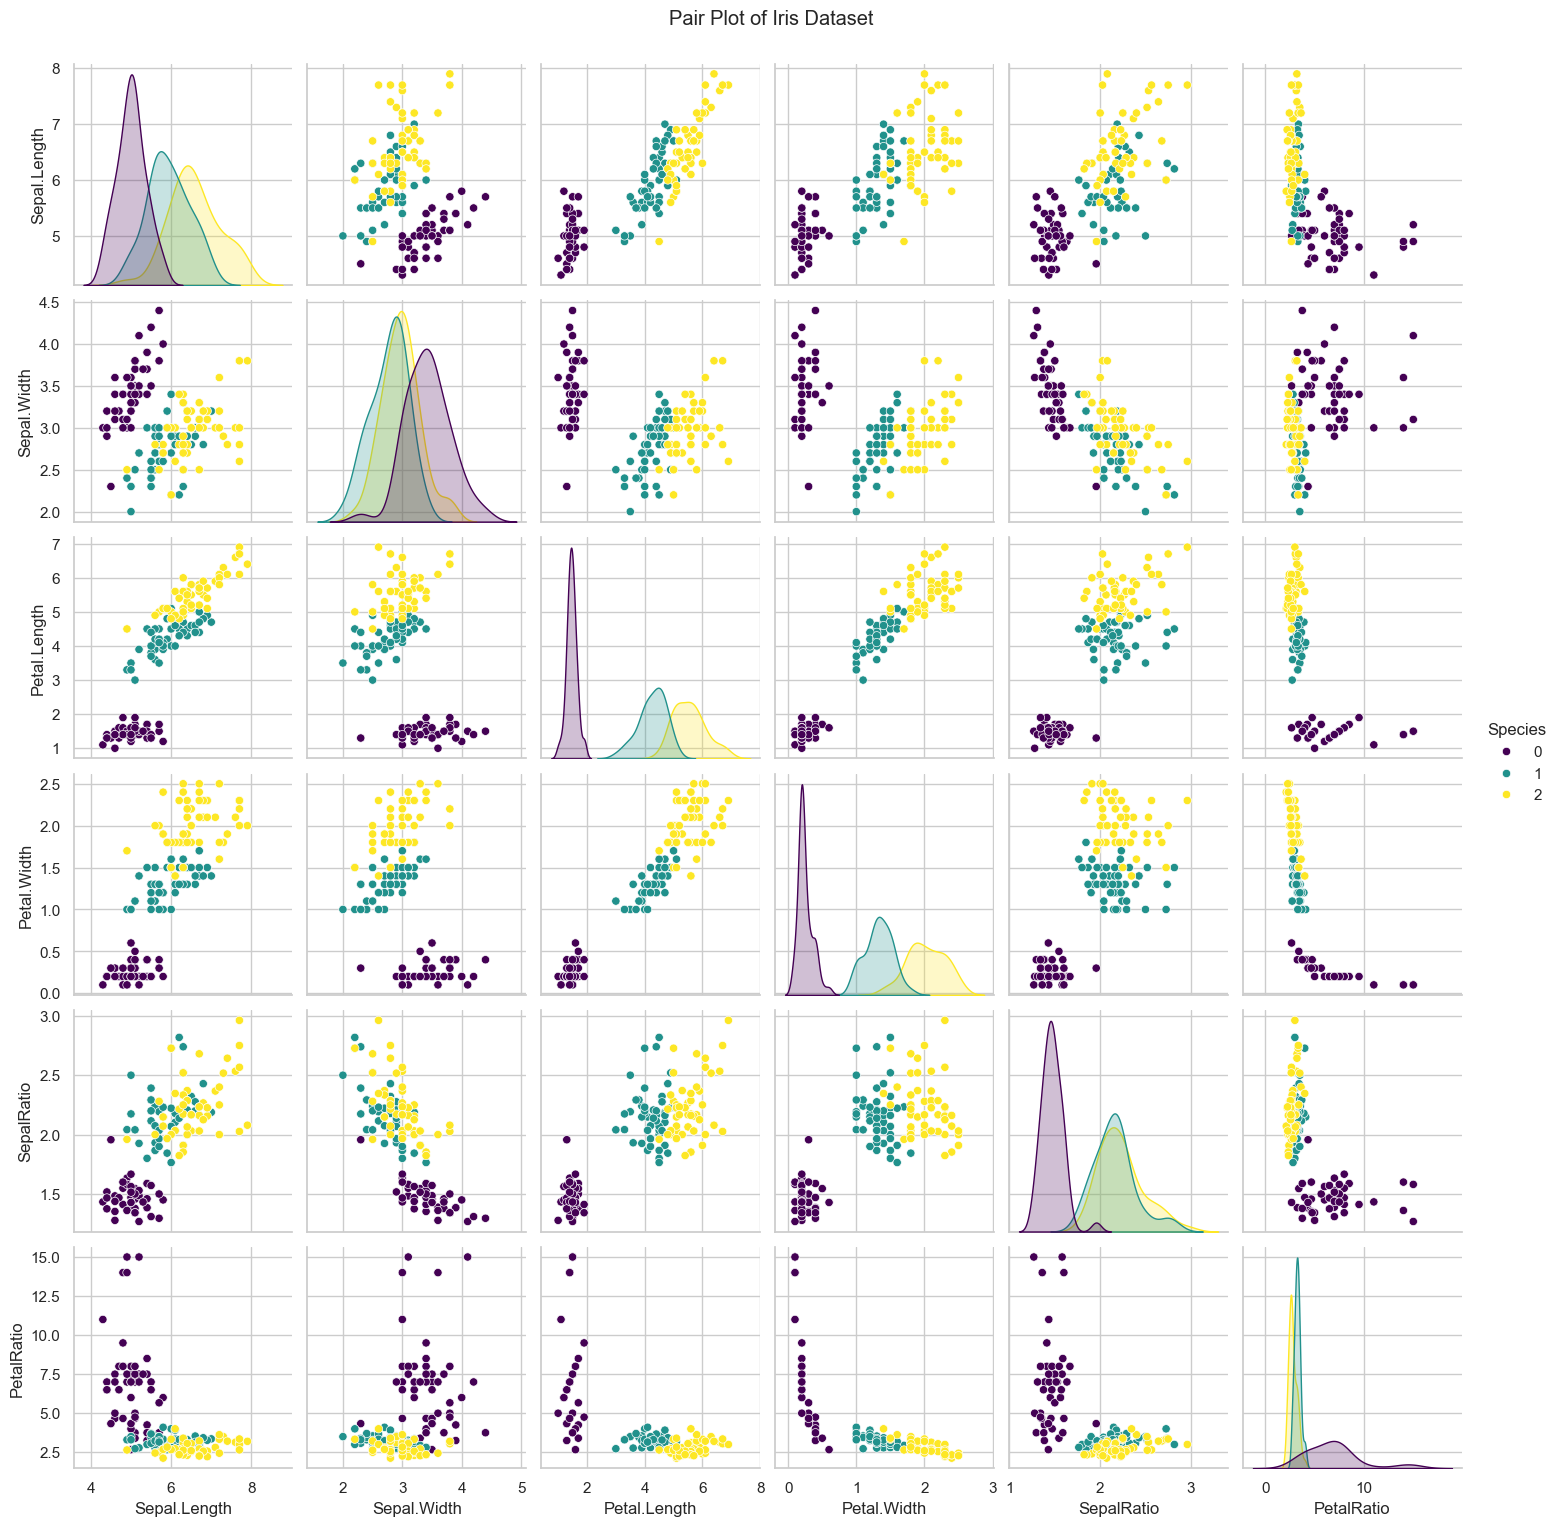

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
import numpy as np

def load_and_analyze_iris(file_path):
    df = pd.read_csv(file_path)
    le = LabelEncoder()
    df['Species'] = le.fit_transform(df['Species'])
    
    print(f"Number of data points: {len(df)}")
    print(f"Data types of columns:\n{df.dtypes}")
    print(f"Column names: {df.columns.tolist()}")
    print(f"Number of flower species: {df['Species'].nunique()}")
    return df

def correct_iris_errors(df):
    df.loc[34] = [4.9, 3.1, 1.5, 0.2, 0]  # Correct 35th row (index 34)
    df.loc[37] = [4.9, 3.6, 1.4, 0.1, 0]  # Correct 38th row (index 37)
    print("\nCorrected Rows:")
    print(df.iloc[[34, 37]])
    return df

def add_features_and_save(df, output_file):
    df['PetalRatio'] = df['Petal.Length'] / df['Petal.Width']
    df['SepalRatio'] = df['Sepal.Length'] / df['Sepal.Width']
    df.to_csv(output_file, index=False)
    print(f"\nNew features added. Data saved to '{output_file}'.")

def calculate_correlations(df):
    numeric_df = df.select_dtypes(include=[np.number])
    correlations = numeric_df.corr()
    
    print("\nPairwise Correlations:")
    print(correlations)
    
    corr_unstacked = correlations.unstack().sort_values(ascending=False)
    highest_positive = corr_unstacked[corr_unstacked < 1].idxmax()
    highest_negative = corr_unstacked.idxmin()

    print(f"\nHighest positive correlation: {highest_positive} = {corr_unstacked[highest_positive]}")
    print(f"Highest negative correlation: {highest_negative} = {corr_unstacked[highest_negative]}")

def scatter_with_regression(df, output_file):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df, x="SepalRatio", y="PetalRatio", hue="Species", palette="Set2")
    for species in df['Species'].unique():
        species_data = df[df['Species'] == species]
        X = species_data['SepalRatio'].values.reshape(-1, 1)
        y = species_data['PetalRatio'].values
        reg = LinearRegression().fit(X, y)
        plt.plot(X, reg.predict(X), label=f"Species {species} Regression", linestyle="--")
    plt.legend()
    plt.title("Sepal Ratio vs Petal Ratio with Regression Lines")
    plt.savefig(output_file)
    plt.close()
    print(f"\nScatter plot saved as '{output_file}'.")

def create_pair_plot(df):
    # Change the style of the pair plot
    sns.set(style="whitegrid")  # Choose a style like 'darkgrid', 'white', 'ticks'
    
    # Set color palette for the plot
    palette = "viridis"  # You can use 'Set2', 'coolwarm', 'viridis', etc.
    
    # Create the pair plot with custom style and color palette
    sns.pairplot(df, hue="Species", vars=["Sepal.Length", "Sepal.Width", "Petal.Length", "Petal.Width", "SepalRatio", "PetalRatio"], palette=palette)
    plt.suptitle("Pair Plot of Iris Dataset", y=1.02)
    plt.show()

def main():
    iris_file = "iris.csv"
    corrected_file = "iris_corrected.csv"
    scatter_plot_file = "iris_scatter_with_regression.pdf"
    
    df = load_and_analyze_iris(iris_file)
    df = correct_iris_errors(df)
    add_features_and_save(df, corrected_file)
    calculate_correlations(df)
    scatter_with_regression(df, scatter_plot_file)
    create_pair_plot(df)

if __name__ == "__main__":
    main()
